In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("moviereviews.tsv",delimiter='\t')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [5]:
df.tail()

,label,review
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...
1999,pos,"a couple of months ago , when i first download..."


In [6]:
df.shape

(2000, 2)

In [7]:
df['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

<AxesSubplot:>

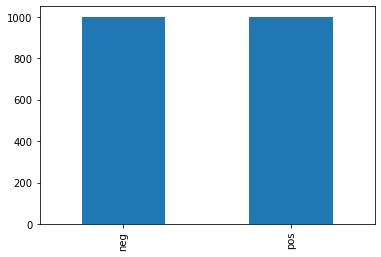

In [8]:
df['label'].value_counts().plot.bar()

In [10]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.shape

(1965, 2)

In [15]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

In [16]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [19]:
text = "I am studying I played football. Students"

In [22]:
for w in text.split(' '):
    print(porter.stem(w))

i
am
studi
i
play
football.
student


In [30]:
' '.join([porter.stem(w) for w in text.split(' ')])

'i am studi i play football. student'

In [31]:
print(df['review'][0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [32]:
df['review'] = df['review'].apply(lambda x:' '.join([porter.stem(w) for w in x.split(' ')]))

C:\Users\Ahmed\AppData\Local\Temp/ipykernel_996/4021159673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:' '.join([porter.stem(w) for w in x.split(' ')]))


In [33]:
print(df['review'][0])

how do film like mous hunt get into theatr ? 
isn't there a law or someth ? 
thi diabol load of claptrap from steven speilberg' dreamwork studio is hollywood famili fare at it deadli worst . 
mous hunt take the bare thread of a plot and tri to prop it up with overact and flat-out stupid slapstick that make comedi like jingl all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the name chiefli respons for thi swill . 
the plot , for what it worth , concern two brother ( nathan lane and an appal lee even ) who inherit a poorli run string factori and a seemingli worthless hous from their eccentr father . 
decid to check out the long-abandon hous , they soon learn that it' worth a fortun and set about sell it in auction to the highest bidder . 
but battl them at everi turn is a veri smart mous , happi with hi run-down littl abod and want it to stay that way . 
the stori altern between unfunni scene of the brother bicker over what to do with their inhe

In [34]:
import string

In [36]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
table = str.maketrans('','',punctuation)
table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [39]:
text = "hello, how?.  ahmed."
text.translate(table)

'hello how  ahmed'

In [40]:
df['review'] = df['review'].apply(lambda x: str(x).translate(table))

C:\Users\Ahmed\AppData\Local\Temp/ipykernel_996/201257397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: str(x).translate(table))


In [41]:
print(df['review'][0])

how do film like mous hunt get into theatr  
isnt there a law or someth  
thi diabol load of claptrap from steven speilberg dreamwork studio is hollywood famili fare at it deadli worst  
mous hunt take the bare thread of a plot and tri to prop it up with overact and flatout stupid slapstick that make comedi like jingl all the way look decent by comparison  
writer adam rifkin and director gore verbinski are the name chiefli respons for thi swill  
the plot  for what it worth  concern two brother  nathan lane and an appal lee even  who inherit a poorli run string factori and a seemingli worthless hous from their eccentr father  
decid to check out the longabandon hous  they soon learn that it worth a fortun and set about sell it in auction to the highest bidder  
but battl them at everi turn is a veri smart mous  happi with hi rundown littl abod and want it to stay that way  
the stori altern between unfunni scene of the brother bicker over what to do with their inherit and endless acti

In [42]:
from nltk.corpus import stopwords

In [44]:
stop = stopwords.words("english")

In [45]:
len(stop)

179

In [46]:
df['review'] = df['review'].apply(lambda x:' '.join([w for w in x.split(' ') if w not in stop]))

In [47]:
print(df['review'][0])

film like mous hunt get theatr  
isnt law someth  
thi diabol load claptrap steven speilberg dreamwork studio hollywood famili fare deadli worst  
mous hunt take bare thread plot tri prop overact flatout stupid slapstick make comedi like jingl way look decent comparison  
writer adam rifkin director gore verbinski name chiefli respons thi swill  
the plot  worth  concern two brother  nathan lane appal lee even  inherit poorli run string factori seemingli worthless hous eccentr father  
decid check longabandon hous  soon learn worth fortun set sell auction highest bidder  
but battl everi turn veri smart mous  happi hi rundown littl abod want stay way  
the stori altern unfunni scene brother bicker inherit endless action sequenc two take increasingli determin furri foe  
whatev promis film start soon deterior bore dialogu  terribl overact  increasingli uninspir slapstick becom sound furi  signifi noth  
the script becom unspeak bad best line poor lee even utter anoth run rodent   hate m